# Plot model fit comparisons for simulation analysis 3

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from mindstorm import statplot
from dcmr import framework
from dcmr import figures
from dcmr import reports

fit_dir = Path(os.environ['CFR_FITS'])
fig_dir = Path(os.environ['CFR_FIGURES']) / 'sim3'
os.makedirs(fig_dir, exist_ok=True)
figures.set_style()
%matplotlib inline

In [2]:
_, stat = framework.comp_version_variants(fit_dir / 'merge')
stat

model
cmrst_fea-cat_sem-context                                                    -33.293027
cmrstb_fea-cat_sem-context_cue-integrative                                   -33.211604
cmrstb_fea-cat_sem-context_cue-focused                                       -33.205688
cmrst_fea-loc_sem-context                                                    -32.215023
cmrstb_fea-loc_sem-context                                                   -32.211990
cmrst_fea-use_sem-context                                                    -32.112514
cmrstb_fea-use_sem-context_cue-integrative                                   -32.108567
cmrstb_fea-use_sem-context_cue-focused                                       -32.098887
cmrst_fea-cat-use_sem-context                                                -31.745599
cmrstb_fea-cat-use_sem-context_cue-integrative                               -31.536401
cmrstb_fea-cat-use_sem-context_cue-focused                                   -31.405336
cmrst_fea-loc-use_sem-cont

In [3]:
res = framework.read_model_switchboard(fit_dir / 'switchboard4')

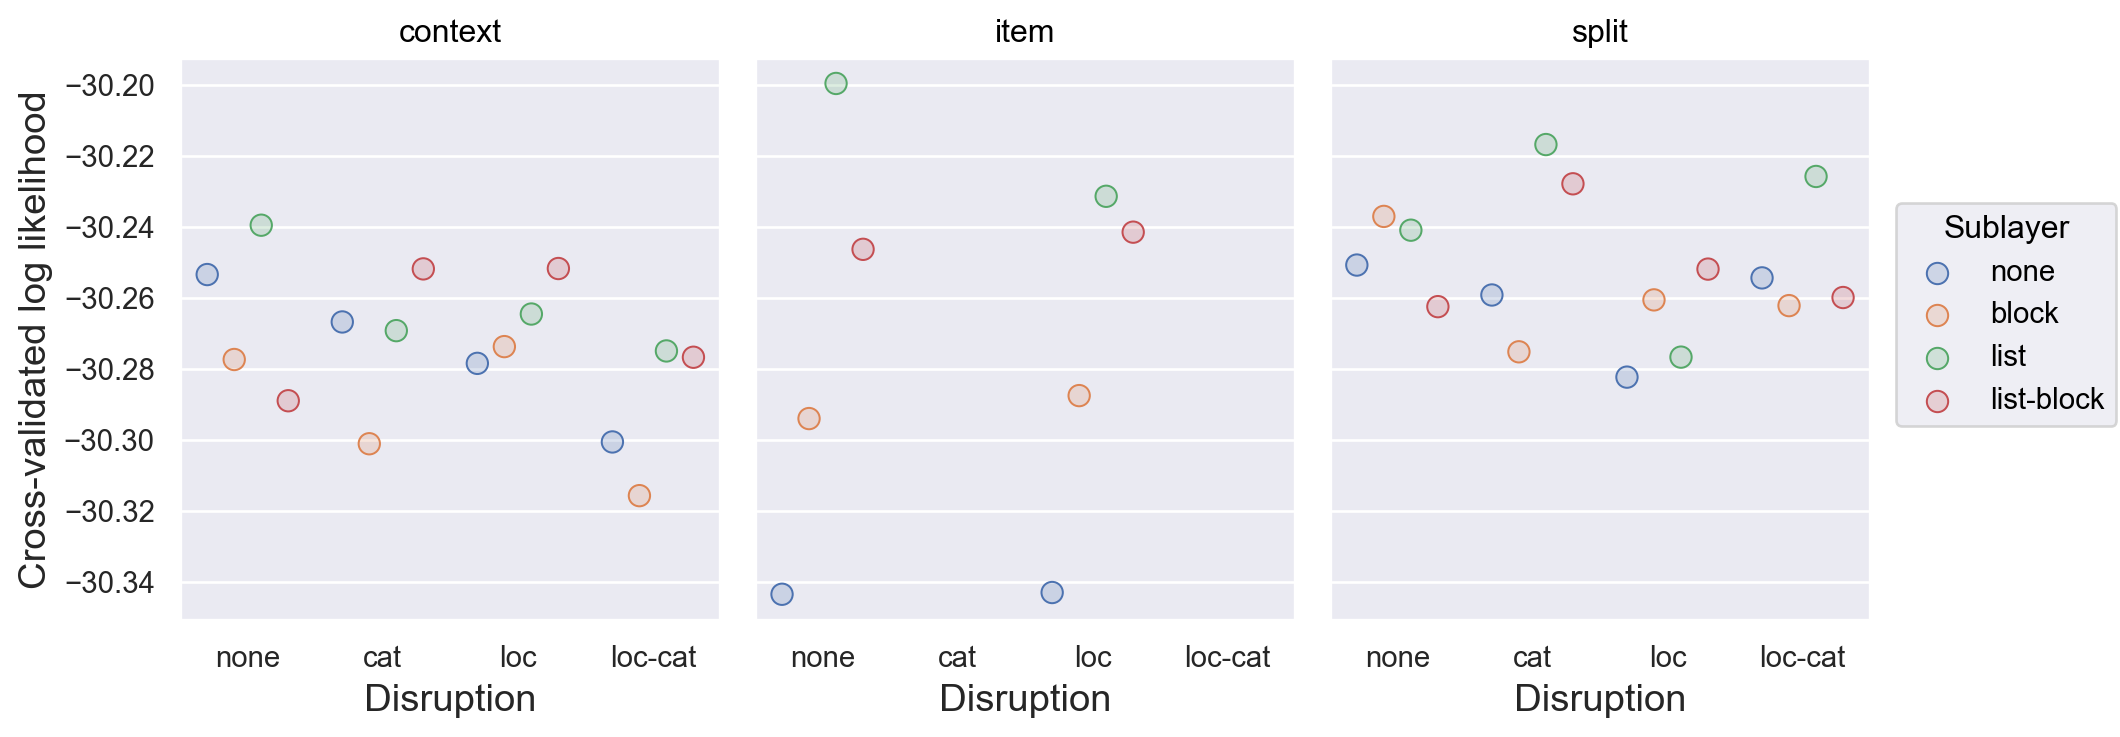

In [12]:
(
    so.Plot(res, y='logl', x='dis', color='sub')
    .facet('sem')
    .add(so.Dots(pointsize=8), so.Dodge())
    .layout(size=(10, 4))
    .label(y='Cross-validated log likelihood', x='Disruption', color='Sublayer')
    .theme({'axes.labelsize': 'large'})
    .save(fig_dir / 'model_switchboard_comp.pdf', bbox_inches='tight')
)

## Load model fits

In [5]:
included = ['DCMR-Disrupt', 'CMR-MP16-L']
models, model_names = framework.get_sim_models('cfr2', 'set2', included=included)

## Plot best-fitting B parameters by sublayer

In [6]:
dark = sns.color_palette(
    'ch:start=1, rot=1.5, light=.7, dark=.3, gamma=1, hue=.5'
)
dark

[(0.7689335648950519, 0.6824396172757954, 0.6240123846554909),
 (0.7250187127782463, 0.5677430873950093, 0.6103083104698684),
 (0.623013021104788, 0.4855809829815538, 0.6161810850461853),
 (0.464634733019296, 0.4332443294049108, 0.5801730795425324),
 (0.31355069957273196, 0.3965359745123169, 0.4760973803152319),
 (0.2050147315167219, 0.34168808481661433, 0.31762490490999895)]

In [7]:
light = sns.color_palette(
    'ch:start=1, rot=1.5, light=.7, dark=.3, gamma=.5, hue=1'
)
light

[(0.9248203983802259, 0.8124754066629261, 0.7365856230946308),
 (0.9370151046580671, 0.7134152392755648, 0.773930517001042),
 (0.8638347057562072, 0.6485629096614572, 0.8531332480304541),
 (0.6875944308206159, 0.6323388125763083, 0.8909732355818533),
 (0.4826946089121227, 0.6491392670198295, 0.8087166257388984),
 (0.325484389760949, 0.649366831333291, 0.5923429764853889)]

In [8]:
B_model = models[model_names.index("DCMR-Disrupt")]
fit = framework.read_model_fits(fit_dir / 'merge', [B_model], ["DCMR-Disrupt"])
B_names = [
    'B_enc_loc',
    'B_enc_cat',
    'B_enc_use',
    'B_rec_loc',
    'B_rec_cat',
    'B_rec_use',
]
B_subset = pd.melt(
    fit[B_names].reset_index(),
    id_vars='subject', 
    value_vars=B_names,
    var_name='parameter',
    value_name='value',
)

/Users/morton/PycharmProjects/dcmr/.venv/lib/python3.12/site-packages/mindstorm/statplot.py:188: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.stripplot(data=data, x=x, y=y, hue=hue, ax=ax, **point_prop, **kwargs)
/Users/morton/PycharmProjects/dcmr/.venv/lib/python3.12/site-packages/mindstorm/statplot.py:203: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=data, x=x, y=y, hue=hue, ax=ax, **bar_prop, **kwargs)
LINO NOT subset; don't know how to subset; dropped


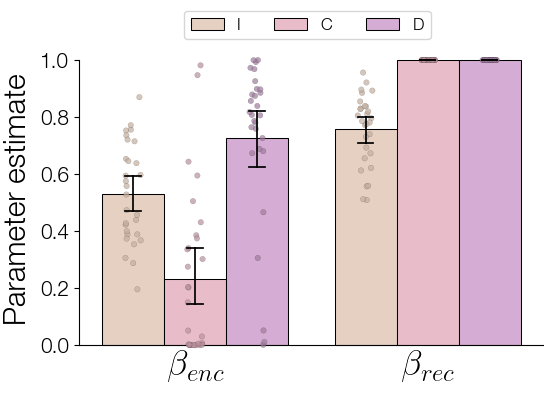

In [9]:
B_labels = [
    r'$\beta_\mathrm{enc}^{I}$',
    r'$\beta_\mathrm{enc}^{C}$',
    r'$\beta_\mathrm{enc}^{D}$',
    r'$\beta_\mathrm{rec}^{I}$',
    r'$\beta_\mathrm{rec}^{C}$',
    r'$\beta_\mathrm{rec}^{D}$',
]
B_subset['phase'] = B_subset['parameter'].map(
    {
        'B_enc_loc': 'enc',
        'B_enc_cat': 'enc',
        'B_enc_use': 'enc',
        'B_rec_loc': 'rec',
        'B_rec_cat': 'rec',
        'B_rec_use': 'rec',
    }
)
B_subset['sublayer'] = B_subset['parameter'].map(
    {
        'B_enc_loc': 'I',
        'B_enc_cat': 'C',
        'B_enc_use': 'D',
        'B_rec_loc': 'I',
        'B_rec_cat': 'C',
        'B_rec_use': 'D',
    }
)
fig, ax = plt.subplots(figsize=(6, 4))
statplot.plot_swarm_bar(
    B_subset,
    x='phase',
    y='value',
    hue='sublayer',
    point_kind='strip',
    light=light,
    dark=dark,
    dodge=True,
    bar_kws={'capsize': 0.2, 'clip_on': False},
    point_kws={'size': 4},
    legend=False,
    ax=ax,
)
ax.set(ylim=(0, 1), ylabel='Parameter estimate')
ax.set_xticks(
    [0, 1], 
    [r'$\beta_{enc}$', r'$\beta_{rec}$'], 
    usetex=True, 
    fontfamily='helvetica',
    fontsize='x-large',
)
ax.tick_params(axis='x', length=0)
ax.set(ylim=(0, 1.08), yticks=np.arange(0, 1.2, 0.2))
ax.spines['left'].set_bounds(0, 1)
fig.legend(loc=(.3375, .9), prop={'size': 12}, ncol=3)
ax.yaxis.set_label_coords(-.1, 0.475)
fig.savefig(fig_dir / 'param_B.pdf')

## Create parameter tables

In [10]:
table, orig = reports.create_model_table(
    fit_dir / 'merge', models, model_names, model_comp='xval'
)
table.to_latex(fig_dir / 'parameters3.tex', escape=False)
table

,DCMR-Disrupt,CMR-MP16-L
$\phi_s$,0.01 (0.00),0.02 (0.00)
$\phi_d$,1.55 (0.19),1.56 (0.18)
$\beta_{\mathrm{enc}}$,---,0.55 (0.02)
"$\beta_{\mathrm{enc},I}$",0.51 (0.02),---
"$\beta_{\mathrm{enc},C}$",0.34 (0.04),---
"$\beta_{\mathrm{enc},D}$",0.63 (0.04),---
$\beta_{\mathrm{start}}$,0.56 (0.04),0.70 (0.05)
$\beta_{\mathrm{rec}}$,---,0.84 (0.01)
"$\beta_{\mathrm{rec},I}$",0.72 (0.02),---
$\theta_s$,0.01 (0.00),0.01 (0.00)


In [11]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.12.10
IPython version      : 9.5.0

pandas    : 2.3.2
mindstorm : 0.11.2
numpy     : 2.1.3
matplotlib: 3.10.5
dcmr      : 1.0.0a0
seaborn   : 0.13.2

